<a href="https://colab.research.google.com/github/LorenzanaD/Diplomado/blob/main/Diabetes_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# configuraciones opcionales para hacer a nuestros 
# gráficos más "bonitos"
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

In [ ]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes['DESCR']) 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [ ]:
diabetes = pd.concat((diabetes['data'], diabetes['target']), axis='columns')
diabetes = diabetes.rename(columns={
    'bmi':'body_mass_index',
    'bp':'average blood pressure',
    's1':'total_serum_cholesterol',
    's2':'low_density_lipoproteins',
    's3':'high_density_lipoproteins',
    's4':'total_cholesterol',
    's6':'blood_sugar_level',
    'target': 'response'})
del diabetes['s5']


In [ ]:
diabetes_1 = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_1

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [ ]:
type(diabetes_1)

pandas.core.frame.DataFrame

In [ ]:
diabetes_1 = diabetes_1.rename(columns={
    'BMI':'body_mass_index',
    'BP':'average blood pressure',
    'S1':'total_serum_cholesterol',
    'S2':'low_density_lipoproteins',
    'S3':'high_density_lipoproteins',
    'S4':'total_cholesterol',
    'S5':'ltg',
    'S6':'blood_sugar_level',
    'Y': 'response'})

In [ ]:
diabetes_1

,AGE,SEX,body_mass_index,average blood pressure,total_serum_cholesterol,low_density_lipoproteins,high_density_lipoproteins,total_cholesterol,ltg,blood_sugar_level,response
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [ ]:
diabetes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        442 non-null    int64  
 1   SEX                        442 non-null    int64  
 2   body_mass_index            442 non-null    float64
 3   average blood pressure     442 non-null    float64
 4   total_serum_cholesterol    442 non-null    int64  
 5   low_density_lipoproteins   442 non-null    float64
 6   high_density_lipoproteins  442 non-null    float64
 7   total_cholesterol          442 non-null    float64
 8   ltg                        442 non-null    float64
 9   blood_sugar_level          442 non-null    int64  
 10  response                   442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [ ]:
diabetes_1.describe()

,AGE,SEX,body_mass_index,average blood pressure,total_serum_cholesterol,low_density_lipoproteins,high_density_lipoproteins,total_cholesterol,ltg,blood_sugar_level,response
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [ ]:
correlaciones = diabetes.corr()
correlaciones


,age,sex,body_mass_index,average blood pressure,total_serum_cholesterol,low_density_lipoproteins,high_density_lipoproteins,total_cholesterol,blood_sugar_level,response
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.208133,0.043062
body_mass_index,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.388680,0.586450
average blood pressure,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.390430,0.441482
total_serum_cholesterol,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.325717,0.212022
low_density_lipoproteins,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.290600,0.174054
high_density_lipoproteins,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.273697,-0.394789
total_cholesterol,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.417212,0.430453
blood_sugar_level,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,1.000000,0.382483
response,0.187889,0.043062,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.382483,1.000000


In [ ]:
correlaciones = diabetes_1.corr()
correlaciones

,AGE,SEX,body_mass_index,average blood pressure,total_serum_cholesterol,low_density_lipoproteins,high_density_lipoproteins,total_cholesterol,ltg,blood_sugar_level,response
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
body_mass_index,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
average blood pressure,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
total_serum_cholesterol,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
low_density_lipoproteins,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
high_density_lipoproteins,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
total_cholesterol,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
ltg,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
blood_sugar_level,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [ ]:
correlaciones['response']


age                          0.187889
sex                          0.043062
body_mass_index              0.586450
average blood pressure       0.441482
total_serum_cholesterol      0.212022
low_density_lipoproteins     0.174054
high_density_lipoproteins   -0.394789
total_cholesterol            0.430453
blood_sugar_level            0.382483
response                     1.000000
Name: response, dtype: float64

<AxesSubplot:>

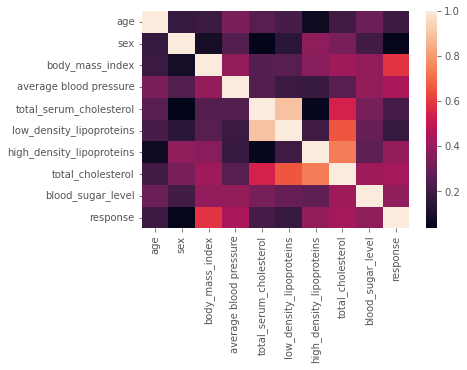

In [ ]:
sns.heatmap(correlaciones.abs())


<AxesSubplot:xlabel='body_mass_index', ylabel='response'>

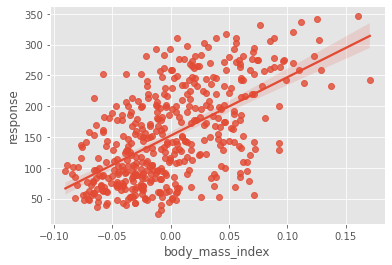

In [ ]:
# Gráfico de dispersión + regresión, realizado con seaborn
sns.regplot(x = "body_mass_index", y = "response", data = diabetes)


In [ ]:
# Coeficiente de correlación de Pearson y su valor P
corr, pvalue = pearsonr(
  x = diabetes['body_mass_index'], 
  y = diabetes['response'])
print("Coeficiente de correlación de Pearson:", corr) 
print("P-value:", pvalue)

Coeficiente de correlación de Pearson: 0.5864501344746887
P-value: 3.466006445167151e-42


In [ ]:
spearmanr(diabetes['body_mass_index'], diabetes['response'])

SignificanceResult(statistic=0.5613820101065616, pvalue=4.567023927725032e-38)

In [ ]:
X = diabetes[['body_mass_index']]
y = diabetes['response']

modelo = LinearRegression()
modelo.fit(X = X.values, y = y)


LinearRegression()

In [ ]:
print("Ordenada:", modelo.intercept_)
print("Pendiente:", list(zip(X.columns, modelo.coef_.flatten())))


Ordenada: 152.13348416289617
Pendiente: [('body_mass_index', 949.4352603840387)]


In [ ]:
print("Coeficiente de determinación R²:", modelo.score(X.values, y)) 

Coeficiente de determinación R²: 0.3439237602253802


Al trabajar con modelos predictivos, no solo es importante ajustarlos, sino también cuantificar su capacidad para predecir nuevas observaciones.

Para poder hacer esta evaluación, vamos a volver a entrenarlo, pero aplicando una metodología muy frecuente en el campo del aprendizaje automático: separar los datos en dos conjuntos de datos, uno de entrenamiento (train) y otro de prueba (test). Esto lo resolveremos con la ayuda de la función train_test_split de scikit-learn, que particionará nuestras X e y, cada una, en dos conjuntos:

In [ ]:
X = diabetes[['body_mass_index']]
y = diabetes['response']

X_train, X_test, y_train, y_test = train_test_split(
  X.values.reshape(-1,1),
  y.values,
  train_size = 0.8,
  random_state = 42,  
  shuffle = True
)

Luego, usaremos el par (X_train, y_train) para ajustar los coeficientes de nuestro regresor...

In [ ]:
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)
print("Ordenada:", modelo.intercept_)
print("Pendiente:", list(zip(X.columns, modelo.coef_.flatten())))


Ordenada: 152.00335421448167
Pendiente: [('body_mass_index', 998.5776891375598)]


...pero ahora evaluaremos la capacidad predictiva usando el par (X_test, y_test):

In [ ]:
print("Coeficiente de determinación R²:", modelo.score(X_test, y_test))


Coeficiente de determinación R²: 0.23335039815872138


Como mencionamos anteriormente, el método más utilizado para el ajuste del modelo lineal es el de mínimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de los cuadrados de los errores...

ε2 = ∑ (yi - ŷi)2
...donde yi son los valores observados e ŷi, los valores estimados.

Pero esta fórmula tiene una doble utilidad, porque podemos partir de ella para generar otro parámetro de la bondad del modelo: la raíz del error cuadrático medio (RMSE, por sus siglas en inglés). RMSE mide justamente la raíz cuadrada del error (∑ (yi - ŷi)2), promediado. Nuevamente scikit-learn nos provee una función mean_squared_error para asistirnos con este cálculo:

In [ ]:
y_pred = modelo.predict(X = X_test)

rmse = mean_squared_error(
  y_true  = y_test,
  y_pred  = y_pred,
  squared = False
)

print("RMSE:", rmse)

RMSE: 64.42577271038341


Ahora te toca a vos: generá una nueva partición train / test de 75% / 25% y random_state = 42 y detallá los parámetros obtenidos.



In [ ]:
X = diabetes[['body_mass_index']]
y = diabetes['response']

X_train, X_test, y_train, y_test = train_test_split(
  X.values.reshape(-1,1),
  y.values,
  train_size = 0.75,
  random_state = 42,  
  shuffle = True
)

In [ ]:
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)
print("Ordenada:", modelo.intercept_)
print("Pendiente:", list(zip(X.columns, modelo.coef_.flatten())))

Ordenada: 152.07653296894014
Pendiente: [('body_mass_index', 975.2769831271274)]


In [ ]:
print("Coeficiente de determinación R²:", modelo.score(X_test, y_test))

Coeficiente de determinación R²: 0.3172099449537781


In [ ]:
y_pred = modelo.predict(X = X_test)

rmse = mean_squared_error(
  y_true  = y_test,
  y_pred  = y_pred,
  squared = False
)

print("RMSE:", rmse)

RMSE: 61.44605114652022


 Si bien podemos interpretar los valores de RMSE teniendo en cuenta la unidad de y, ¿no resultaría más cómodo ajustar este valor para que quede expresado de forma adimensional? Así es como surge la métrica RMSE normalizado:

RMSEnormalizado = RMSE / (ymax - ymin)
De este modo podremos obtener valores entre 0 y 1, donde los valores más cercanos a 0 representan modelos de mejor ajuste.

Ahora te toca a vos: calculá el valor de RMSEnormalizado del modelo obtenido en el ejercicio anterior.

In [ ]:
rmse_normalizado = rmse / (max(y) - min(y))
rmse_normalizado

0.1914207200826175

In [ ]:
def normalizar_rmse(rmse, y):
  return rmse / (max(y) - min(y))

Ya podemos decir que hemos ajustado nuestro modelo, caracterizado y evaluado. De esta forma, no sólo podemos explicar la relación entre las variables, sino que también podemos determinar su poder predictivo y compararlo con el de otros modelos más sofisticados que eventualmente realicemos.

Predecir valores
 Primero, definamos una función para hacer más sencillo el uso del modelo:

In [ ]:
def predecir_respuesta(imc):
  return modelo.predict([[imc]])[0]


Y ahora probemos con un índice de masa corporal "normal" según la OMS:

In [ ]:
predecir_respuesta(20)
1881.9868473136542


1881.9868473136542

¿Qué, qué? ¡Esto no puede estar bien! El máximo valor de response es de aproximadamente 350:

In [ ]:
max(diabetes["response"])
346.0

346.0

Lote de datos que nos proveyó inicialmente scikit-learn, veremos que dice lo siguiente:

(...) each of these 10 feature variables have been mean centered and scaled (...) (cada una de estas 10 variables han sido centradas y escaladas)

podemos revertir la transformación así:

In [ ]:
def transformar_imc(imc):
  # los valores originales del IMC se encuentran acá 
  # https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
  # No desarrollaremos el proceso para obtener estos coeficientes, pero 
  # te invitamos a que lo deduzcas usando lo que vimos en esta lección 🤭
  return (imc - 26.375791855203694) / 92.78055277 

def predecir_respuesta(imc):
  return modelo.predict([[transformar_imc(imc)]])[0]


In [ ]:
predecir_respuesta(20)

85.05642088786432

<AxesSubplot:xlabel='body_mass_index', ylabel='response'>

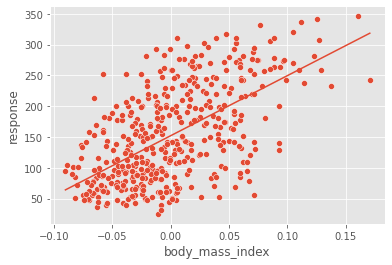

In [ ]:
# gráfica similar a que anteriormente realizamos usando regplot
# pero ahora utilizando a las predicciones del modelo que ajustamos
sns.scatterplot(x="body_mass_index", y="response", data=diabetes)
sns.lineplot(x="body_mass_index", y=modelo.predict(X = X.values), data=diabetes)
